<a href="https://colab.research.google.com/github/VeePollux/Calculo_Numerico_Computacional/blob/main/Relat%C3%B3rio4_VanessaAldrighi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório

##Imports

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting.plot import PlotGrid
import pandas as pd

##Métodos

###Trapézio

In [ ]:
def algTrapezio(a, b, n, f):
  h = (b - a)/n
  if(n == 1):
    areaTrap = h * (f(a) + f(b))/2
    return areaTrap
  sum = f(a) + f(b)
  for i in range(1, n):
    aux = a + h * (i)
    sum = sum + 2 * f(aux)
  areaTrap = h * sum/2
  return areaTrap

In [ ]:
def plotTrapezio(a, b, n, f):
  array = np.arange(a, b +0.5,(b-a)/n)
  valores = [f(valor) for valor in array]


  for i in range(len(array)):
    plt.plot(np.full_like(array, array[i]), np.linspace(0, valores[i], num=n+1), color = 'gray',linestyle='-.' )
  for i in range(len(array)-1):
    plt.plot([array[i], array[i+1]], [valores[i], valores[i+1]], color = 'red', linestyle='-.')
    plt.fill_between([array[i], array[i+1]], [valores[i], valores[i+1]], alpha = 0.3, label = 'Área do trapézio')

  curva = np.linspace(b, a, 100)

  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, 'k-', label='f(x)')
  plt.title("Método Trapézio")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid(alpha = 0.3)  # Adiciona uma grade ao gráfico
  plt.axhline(0, color='black',linewidth=1)  # Adiciona uma linha horizontal no eixo y
  #plt.axvline(0, color='black',linewidth=0.5)
  plt.legend( loc="upper right")
  plt.show()


###Simpson

1/3 de Simpson

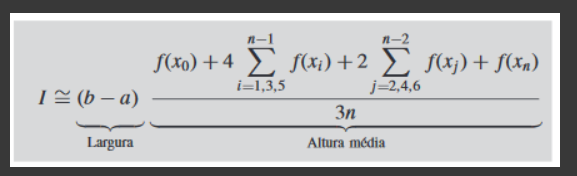

In [ ]:
def algSimp13(a, b , n, f):
  h = (b-a)/n
  #simp13m
  sum = f(a)
  for i in range(1, n-1, 2):
    aux = a + h*(i)
    aux_prox = a + h*(i + 1)
    sum = sum + 4*f(aux) + 2*f(aux_prox)
  sum = sum + 4*f(b-h) + f(b)
  simp13 = h * sum/3
  return simp13

[Método Simpson 3/8 feito através deste vídeo](https://www.youtube.com/watch?app=desktop&v=130WozJKkJQ)

In [ ]:
def algSimp38(a, b, n, f):
  h = (b-a)/n
  x = [a + i * h for i in range(n+1)]
  y = [f(x_i) for x_i in x]
  if n%3==0:
    h=(b-a)/n
    sum=f(a)+f(b)
    for i in range(1,n):
      if i%3==0: #Quando i é divisível por 3 multiplica por 2
        sum= sum + 2*f(a+i*h)
      else:
        sum+=3*f(a+i*h) #Quando não é, é multiplicado por 3
  return sum*(3*h/8)

In [ ]:
def plotSimp13(a,b,n,f):

  x = np.linspace(a, b, n + 1)
  y = [f(x_i) for x_i in x]

  curva = np.linspace(b, a, 100)
  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, 'k-', label = 'f(x)')

  for i in range(0, n, 2):
    # Coordenadas dos três pontos do subintervalo
    x_points = x[i:i+3]
    y_points = y[i:i+3]
    # Calcular o polinômio de segundo grau (parábola) que passa pelos três pontos
    coef = np.polyfit(x_points, y_points, 2)
    poly = np.poly1d(coef)
    # Calcular os pontos no intervalo
    x_interval = np.linspace(x[i], x[i+2], 100)
    y_interval = poly(x_interval)
    # Plotar a curva de Simpson 1/3 em cada subintervalo
    plt.plot(x_interval, y_interval, linestyle='-.', color='red')
    plt.fill_between(x_interval, y_interval, alpha = 0.3, label = 'Área do Simpson')
  array = np.arange(a+2*(b-a)/n, b-2*(b-a)/n +0.5,2*(b-a)/n)
  valores = [f(valor) for valor in array]
  print("Array:", array, "\nvalores: ", valores)
  for i in range(len(array)):
    plt.plot(np.full_like(array, array[i]), np.linspace(0, valores[i], num=int(n/3)),linestyle='-.', color='gray')

  plt.plot([a, a], [0, f(a)], linewidth=1.5, linestyle='-.', color='gray')
  plt.plot([b, b], [0, f(b)], linewidth=1.5, linestyle='-.', color='gray')
  plt.grid(alpha = 0.3)  # Adiciona uma grade ao gráfico
  plt.axhline(0, color='black',linewidth=1)  # Adiciona uma linha horizontal no eixo y
  plt.plot([a, b], [0, 0], linewidth=1.5, linestyle='-.', color='gray')
  plt.title("Método Simp13")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(['$f(x)$', '1/3 de Simpson'], loc="upper right")
  plt.show()


In [ ]:
def plotSimp38(a,b,n,f):

  x = np.linspace(a, b, n + 1)
  y = [f(x_i) for x_i in x]

  curva = np.linspace(b, a, 100)
  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, 'k-', label = 'f(x)')

  for i in range(0, n - 2, 3):
    # Coordenadas dos quatro pontos do subintervalo
    x_points = x[i:i+4]
    y_points = y[i:i+4]

    # Calcular o polinômio cúbico que passa pelos quatro pontos
    coef = np.polyfit(x_points, y_points, 3)
    poly = np.poly1d(coef)

    # Calcular os pontos no intervalo
    x_interval = np.linspace(x[i], x[i+3], 100)
    y_interval = poly(x_interval)

    # Plotar a curva de Simpson 3/8 em cada subintervalo sem legenda
    plt.plot(x_interval, y_interval, linestyle='-.', color='red')
    plt.fill_between(x_interval, y_interval, alpha = 0.3, label = 'Área do Simpson')
  array = np.arange(a+3*(b-a)/n, b-3*(b-a)/n +0.5,3*(b-a)/n)
  valores = [f(valor) for valor in array]
  print("Array:", array, "\nvalores: ", valores)
  #plt.plot([array,0], [array,valores], linewidth=1.5, linestyle='-.', color='green')
  #plt.plot(array, valores, color = 'gray',linestyle='-.' )
  plt.vlines(array, 0, valores,color = 'gray',linestyle='-.' )

  plt.plot([a, a], [0, f(a)], linewidth=1.5, linestyle='-.', color='gray')
  plt.plot([b, b], [0, f(b)], linewidth=1.5, linestyle='-.', color='gray')
  plt.grid(alpha = 0.3)  # Adiciona uma grade ao gráfico
  plt.axhline(0, color='black',linewidth=1)  # Adiciona uma linha horizontal no eixo y
  plt.plot([a, b], [0, 0], linewidth=1.5, linestyle='-.', color='gray')
  plt.title("Método Simp13")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(['$f(x)$', '3/8 de Simpson'], loc="upper right")
  plt.show()


###Euler

In [ ]:
def euler(a, b, y0, m, f):
  VetX = np.zeros(m+1)
  VetY = np.zeros(m+1)
  h = (b-a)/m
  x = a
  y = y0
  VetX[0]= x
  VetY[0] = y
  fxy = f(x,y)
  for i in range(1, m+1):
    x = a + i*h
    y = y +h*fxy
    fxy = f(x,y)
    VetX[i] = x
    VetY[i]=y
  return VetX, VetY

###RK4

In [ ]:
def metRk4(a, b, y0, m, f):
  VetX = np.zeros(m+1)
  VetY = np.zeros(m+1)
  h = (b-a)/m
  xt = a
  yt = y0
  VetX[0] = xt
  VetY[0]=yt
  for i in range(1, m+1):
    x = xt
    y = yt
    k1 = f(x,y)
    x = xt + h/2
    y = yt + h/2 * k1
    k2 = f(x,y)
    y = yt + h/2 * k2
    k3 = f(x,y)
    x = xt + h
    y = yt + h *k3
    k4 = f(x,y)
    xt = a + i * h
    yt = yt + h/6 * (k1 + 2*(k2 + k3)+k4)
    VetX[i] = xt
    VetY[i] = yt
  return VetX, VetY

##Questões

###Questão 1

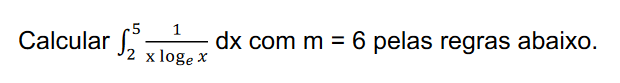

In [ ]:
f1Q1 = lambda x: 1/(x*(math.log(x)))
a1 = 2
b1 = 5
m1 = 6

a) Trapézio

In [ ]:
areaTrapezio = algTrapezio(a1, b1, m1, f1Q1)
print("Área do trapézio: ", areaTrapezio)

Área do trapézio:  0.859456862410861


b) 1/3 de Simpson

In [ ]:
areaSimp13 = algSimp13(a1,b1,m1,f1Q1)
print("Área de Simpson 1/3: ", areaSimp13)

Área de Simpson 1/3:  0.8437567467706143


c) 3/8 de Simpson

In [ ]:
areaSimp38 = algSimp38(a1,b1,m1,f1Q1)
print("Área de Simpson 3/8: ", areaSimp38)

Área de Simpson 3/8:  0.8448499887110598


d) Comparar esses três resultados com o valor exato log* (log*(5)) −
log* (log*(2)) ≈ 0,84240

Como vimos em aula, a Regra de Simpson 3/8 tende a ser mais precisa do que a Regra de Simpson 1/3, pois ela usa mais pontos para a interpolação e, portanto, tem uma estimativa mais precisa da curva da função, no entanto, o método 1/3 de Simpson chegou mais próximo ao resultado exato, isso pode acontecer simplesmente por questões de arredondamento nos cálculos, já que o resultado entre os dois métodos ficou aproximadamente igual entre eles, e entre o valor exato.

Já sobre o método do Trapézio é esperado que seu resultado seja o pior entre os 3 métodos por ser um método mais simples que calcula a área através de trapézios.  Obviamente, se levarmos em consideração uma função em linha reta ou o uso de vários subintervalos seus resultados serão muito melhores, mas não foi o que aconteceu nesta questão.

e) Plotar os gráficos para cada um dos métodos

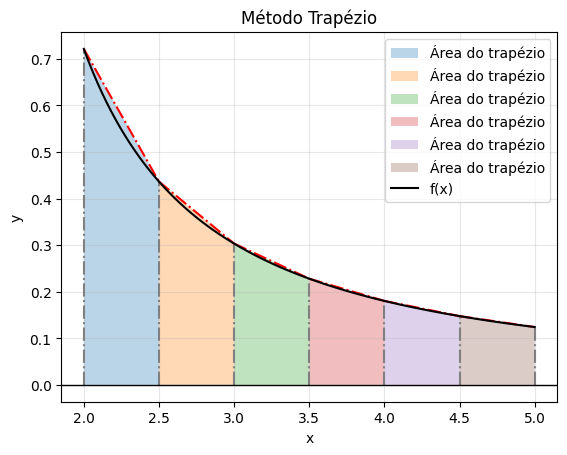

In [ ]:
plotTrapezio = plotTrapezio(a1, b1, m1, f1Q1)

Array: [3. 4.] 
valores:  [0.30341307554227914, 0.18033688011112042]


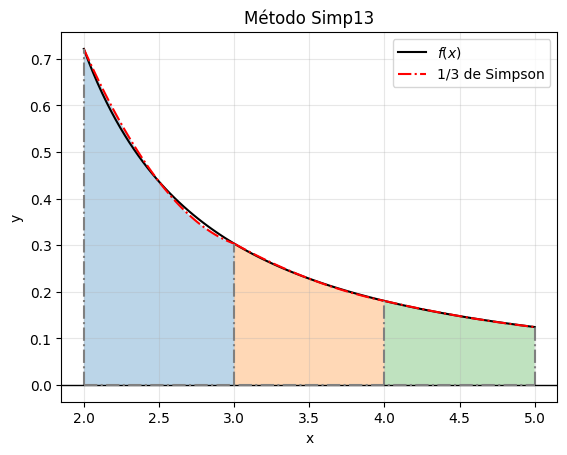

In [ ]:
plotSimp13 = plotSimp13(a1, b1, m1, f1Q1)

Array: [3.5] 
valores:  [0.22806731432797944]


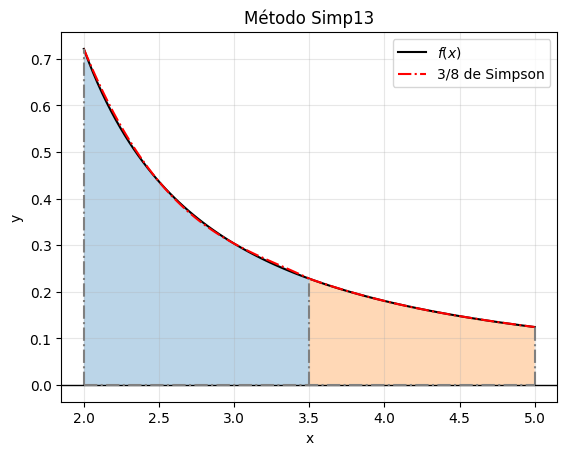

In [ ]:
plotSimp38 = plotSimp38(a1, b1, m1, f1Q1)

###Questão 2

Resolver o problema de valor inicial abaixo utilizando o método de Euler
e Runge-Kutta de ordem quatro com o número de subintervalos m
indicado.

a) y’ = x² + y², y(1) = 0, x ∈ [1, 2] e m = 8

In [ ]:
f1Q2 = lambda x, y: x**2 + y**2
m = 8
a = 1
b = 2
y0 = 0

EulerX, EulerFX = euler(a,b,y0,m,f1Q2)
print("Euler:\n")
df = pd.DataFrame({'Abscissas': EulerX,
                   'Solução do PVI': EulerFX})
display(df)

Rk4X, Rk4FX = metRk4(a,b,y0,m,f1Q2)
print("\nRk4:\n")

df1 = pd.DataFrame({'Abscissas': Rk4X,
                   'Solução do PVI': Rk4FX})
display(df1)


Euler:



,Abscissas,Solução do PVI
0,1.000,0.000000
1,1.125,0.125000
2,1.250,0.285156
3,1.375,0.490633
4,1.500,0.757051
5,1.625,1.109942
6,1.750,1.594017
7,1.875,2.294440
8,2.000,3.391950



Rk4:



,Abscissas,Solução do PVI
0,1.000,0.000000
1,1.125,0.142066
2,1.250,0.325451
3,1.375,0.565747
4,1.500,0.889976
5,1.625,1.350279
6,1.750,2.063418
7,1.875,3.359401
8,2.000,6.683613
